# ch9.4 k_means
试编程实现 K 均值算法设置三组不同的K值、三组不同初始中心点，在西瓜数据集4.0上进行实验比较，并讨论什么样的初始中心有利于取得好结果。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('data/table_9_1_watermelon_4_0.csv')
dataset = dataset.drop(['Idx'], axis=1)

In [3]:
def get_nearest_dist_num(x_j, u):
    dist = np.zeros(len(u))
    for i in range(len(u)):
        dist[i] = np.sum((x_j-u[i])**2)
    return np.argmin(dist)

In [5]:
def k_means(dataset, k=3):
    random_int = np.random.randint(0,len(dataset),size=k)
    while len(np.unique(random_int)) < k:
        random_int = np.random.randint(0,len(dataset),size=k)
    count = 0
    u = np.zeros([k, 2])
    print('k-means: k=',end="")
    print(k)
    for i in range(k):
        u[i] = list(dataset.ix[random_int[i],:-1])
    print(u)

    for t in [221,222,223,224]:
        C = dict()
        for i in range(k):
            C[i] = []
        for j in range(len(dataset)):
            lambda_j = get_nearest_dist_num(np.array(dataset.ix[j,:-1]), u)
            C[lambda_j].append(list(dataset.ix[j,:-1]))
        for i in range(k):
            u[i] = np.mean(C[i], axis=0)

        dataset0 = dataset[dataset['label']==0]
        dataset1 = dataset[dataset['label']==1]
        color = ['g', 'b', 'r']
        fig = plt.subplot(t)
        for i in range(k):
            fig.plot(np.array(C[i])[:,0], np.array(C[i])[:,1], color[i]+'.')
            fig.plot(u[i,0],u[i,1], color[i]+'+')

        plt.show()

k-means: k=2
[[ 0.725  0.445]
 [ 0.774  0.376]]


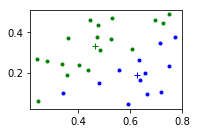

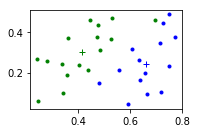

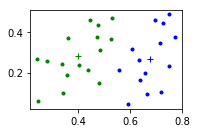

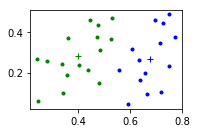

In [8]:
k_means(dataset, k=2)

k-means: k=2
[[ 0.478  0.437]
 [ 0.525  0.369]]


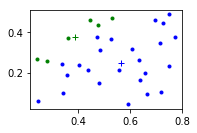

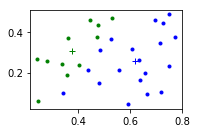

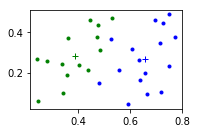

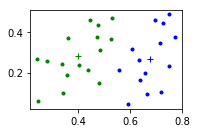

In [9]:
k_means(dataset, k=2)